In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import NearestNeighbors

from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
# 1) FRESH: annual spending (m.u.) on fresh products (Continuous);
# 2) MILK: annual spending (m.u.) on milk products (Continuous);
# 3) GROCERY: annual spending (m.u.) on grocery products (Continuous);
# 4) FROZEN: annual spending (m.u.) on frozen products (Continuous)
# 5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
# 6) DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous);
# 7) CHANNEL: customers' Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
# 8) REGION: customers' Region - Lisnon, Oporto or Other (Nominal)
# Descriptive Statistics:

# (Minimum, Maximum, Mean, Std. Deviation)
# FRESH ( 3, 112151, 12000.30, 12647.329)
# MILK (55, 73498, 5796.27, 7380.377)
# GROCERY (3, 92780, 7951.28, 9503.163)
# FROZEN (25, 60869, 3071.93, 4854.673)
# DETERGENTS_PAPER (3, 40827, 2881.49, 4767.854)
# DELICATESSEN (3, 47943, 1524.87, 2820.106)

# REGION Frequency
# Lisbon 77
# Oporto 47
# Other Region 316
# Total 440

# CHANNEL Frequency
# Horeca 298
# Retail 142
# Total 440



# 1 Loading the Data, Preprocessing, Initial Data Analysis

In [3]:
df = pd.read_csv("./Wholesale customers data.csv")
df = df.drop(columns=["Channel", "Region"])
df


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]

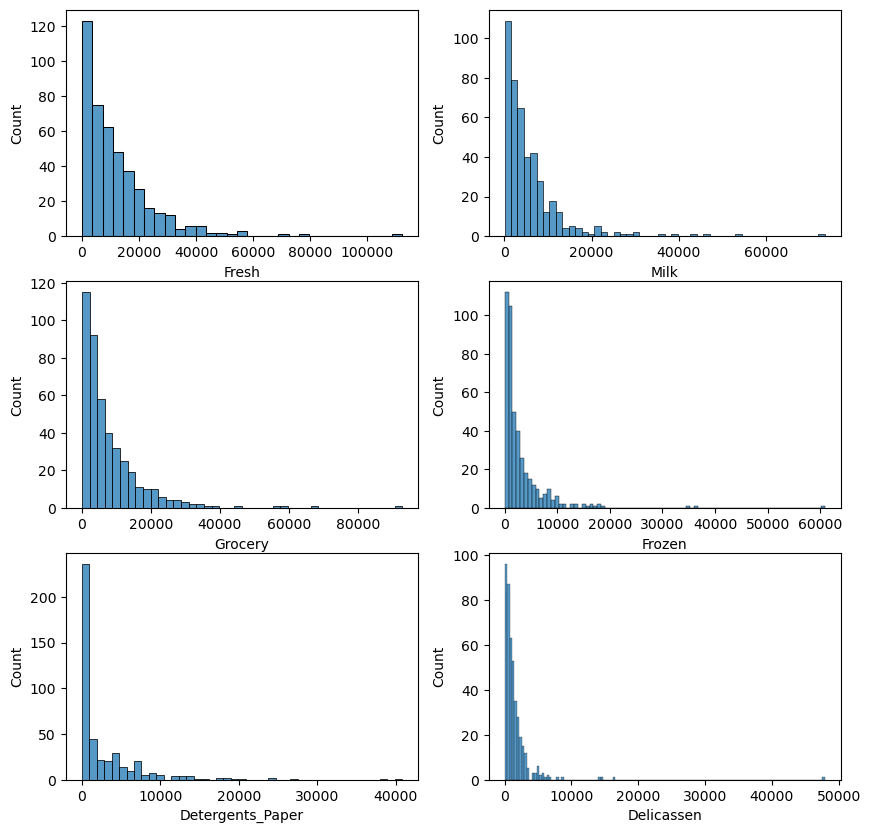

In [4]:
def plot_hist_cols():
    fig, axes = plt.subplots(3, 2, figsize=(10, 10))
    axes = axes.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=axes[i])


plot_hist_cols()


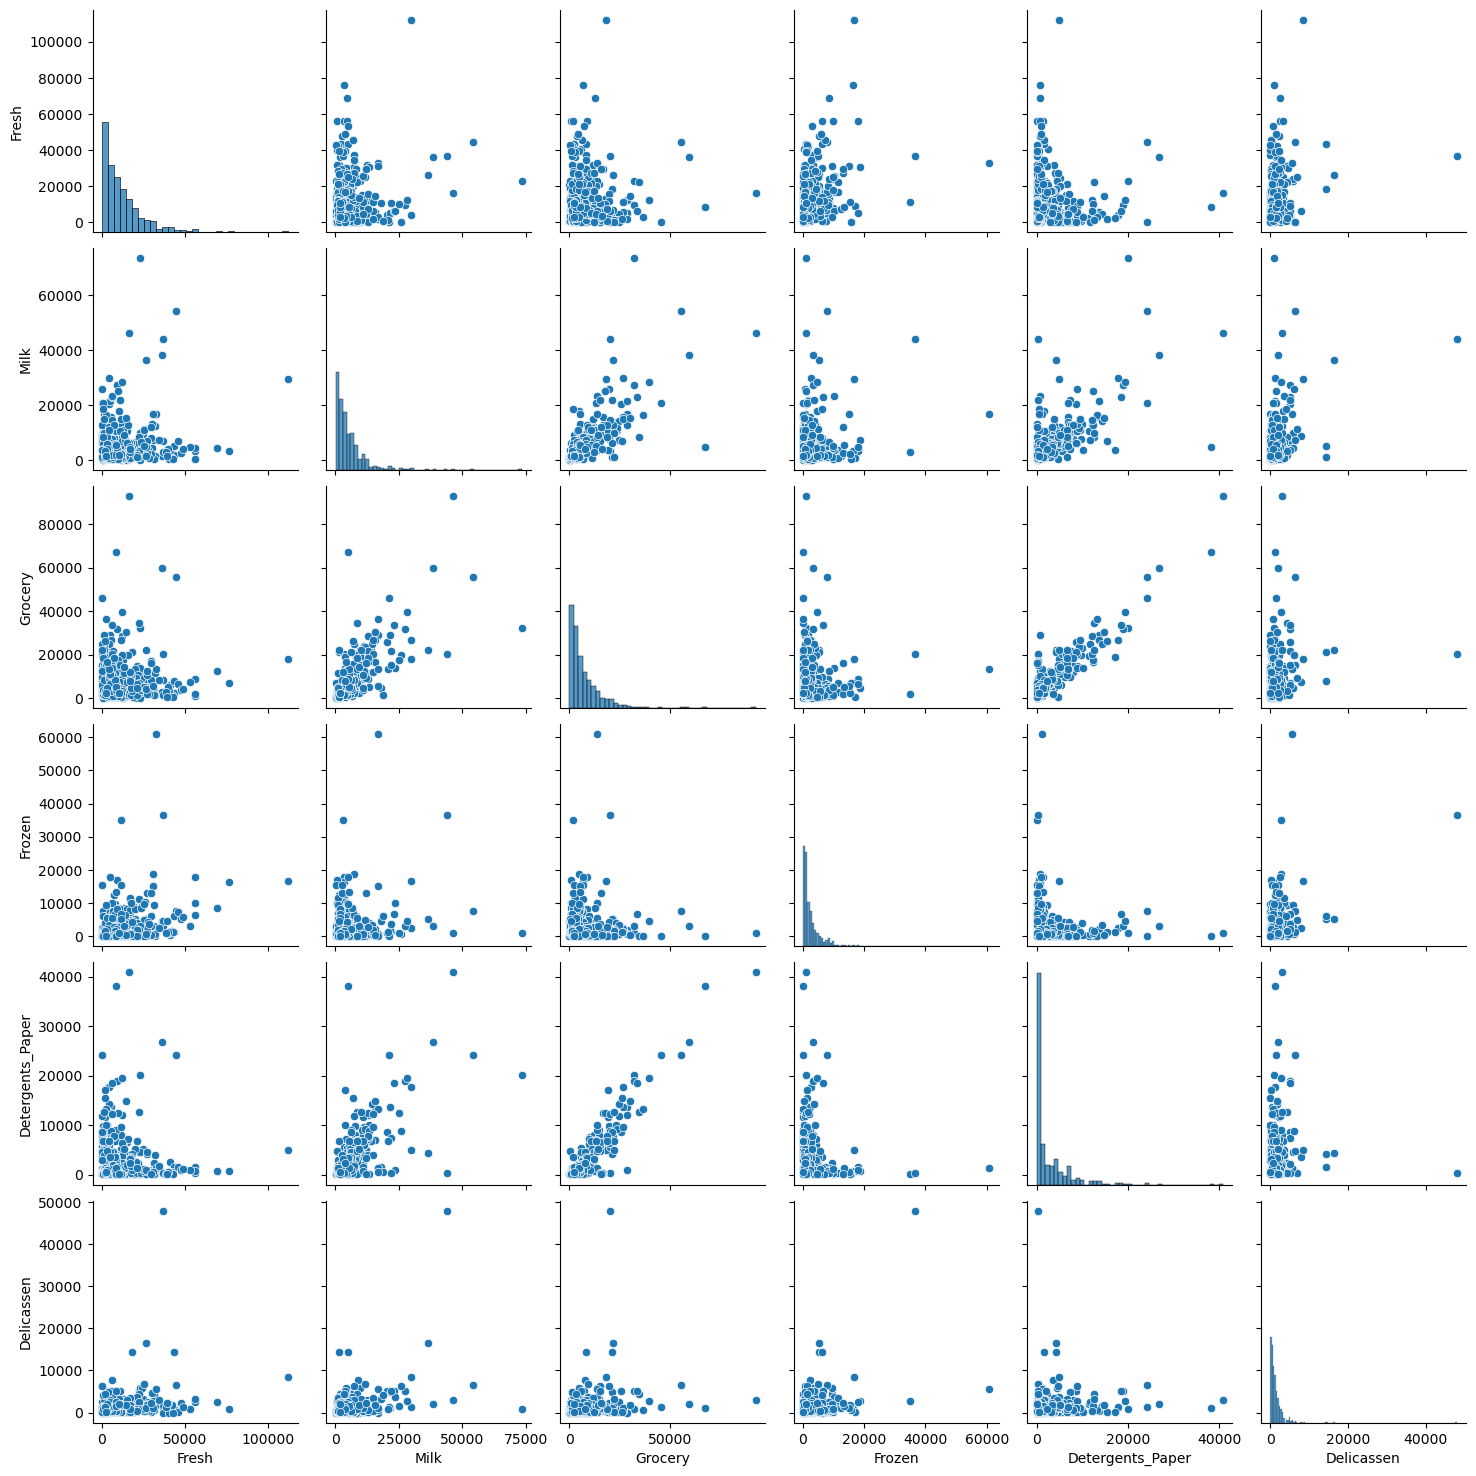

In [5]:
sns.pairplot(df)


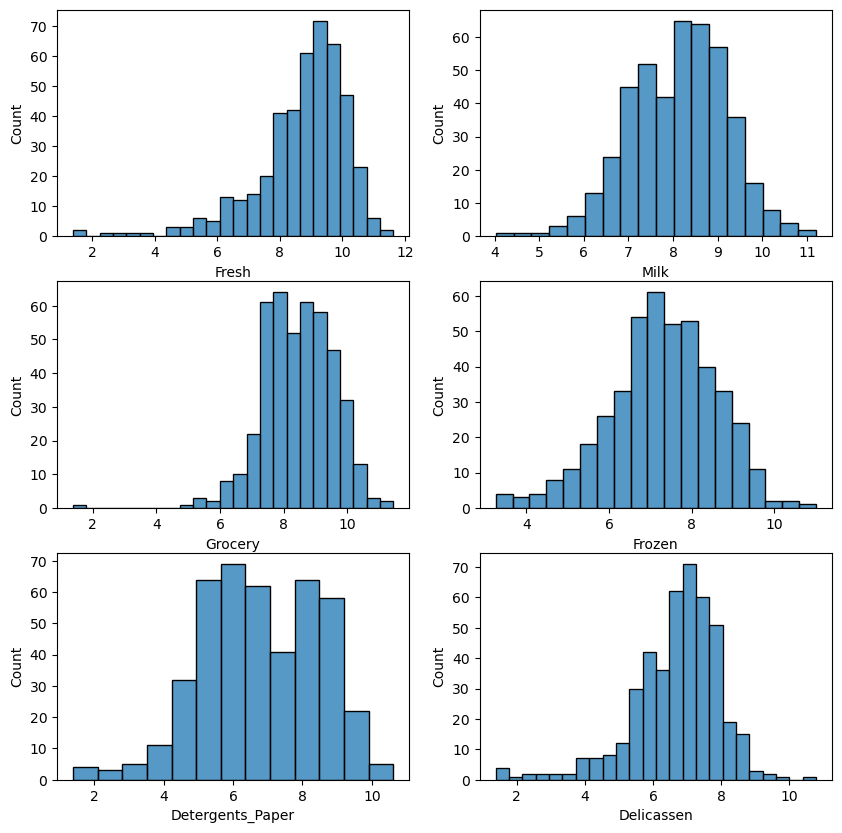

In [6]:
df = np.log(df + 1)
plot_hist_cols()


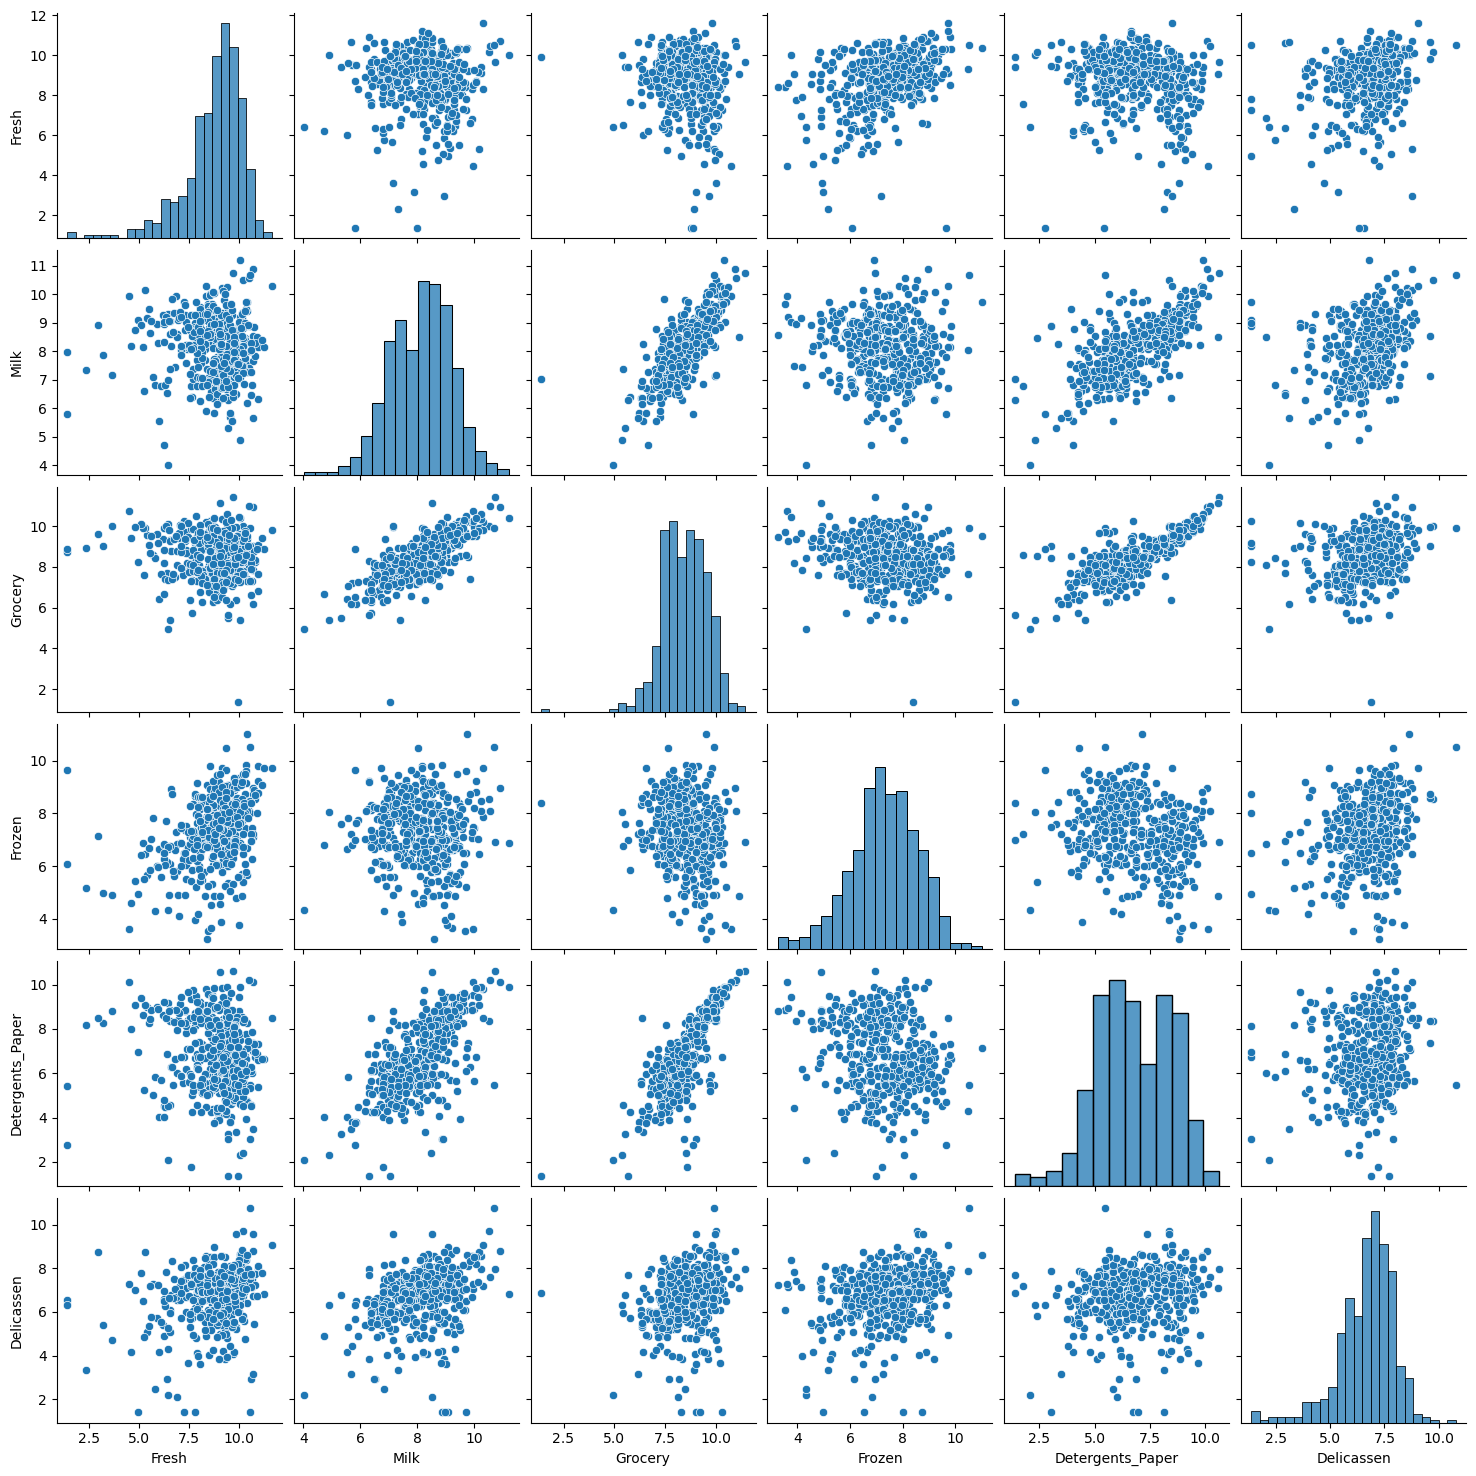

In [7]:
sns.pairplot(df)


# 2 Detecting Anomalies

In [8]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm="ball_tree").fit(df.to_numpy())
distances, indices = nbrs.kneighbors(df.to_numpy())
df["outlier_score_min"] = distances[:, 1]
df.sort_values(by="outlier_score_min", ascending=False).head(10)

Fresh       Milk    Grocery     Frozen  Detergents_Paper  Delicassen  \
338   1.386294   5.811141   8.856803   9.655154          2.772589    6.311735   
75    9.923241   7.037028   1.386294   8.391176          1.386294    6.883463   
154   6.434547   4.025352   4.927254   4.330733          2.079442    2.197225   
142  10.519673   8.875287   9.018453   8.005033          3.044522    1.386294   
95    1.386294   7.979681   8.740817   6.089045          5.411646    6.565265   
187   7.799343   8.987572   9.192176   8.743532          8.149024    1.386294   
128   4.948760   9.087947   8.249052   4.962845          6.968850    1.386294   
183  10.514557  10.690831   9.912001  10.506026          5.480639   10.777789   
204   7.579168   6.793466   8.561593   7.232733          1.791759    7.192182   
109   7.249215   9.724959  10.274603   6.513230          6.729824    1.386294   

     outlier_score_min  
338           4.945913  
75            4.647444  
154           4.201955  
142           3.774788  
95            3.746081  
187           3.001067  
128           2.973513  
183           2.956699  
204           2.920883  
109           2.721484

In [9]:
np.var(df['outlier_score_min'])

0.34867098448416445

In [10]:
nbrs = NearestNeighbors(n_neighbors=len(df), algorithm="ball_tree").fit(df.to_numpy())
distances, indices = nbrs.kneighbors(df.to_numpy())
gamma = 1

def softmin(z, gamma):
    return -1 / gamma * np.log(1 / (len(z) - 1)) * np.sum(np.exp(-gamma * z))


df["outlier_score_softmin"] = np.apply_along_axis(softmin, 1, distances[:, 1:], gamma)
df.sort_values(by="outlier_score_softmin", ascending=False).head(10)

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
246   9.092232  7.795235  7.483244  7.483244          6.066108    6.415097   
119   9.019059  7.760041  7.672292  8.267962          5.587249    6.455199   
307   9.760079  7.772753  7.952615  7.047517          5.863631    6.830874   
374   8.754476  7.721792  7.419980  7.308543          5.743003    6.532334   
389   9.146974  7.333676  7.260523  8.013012          5.429346    6.529419   
162   9.627602  7.613325  8.245647  7.888335          5.451038    6.415097   
241  10.123827  7.496652  7.814400  7.703910          6.023448    6.954639   
83    9.946308  7.355002  7.486613  7.749753          6.311735    6.650279   
118   9.905984  7.545390  7.767687  8.583730          6.021023    6.839476   
296   9.856815  7.173958  8.200837  8.021585          6.566672    6.801283   

     outlier_score_min  outlier_score_softmin  
246           0.521668             223.619616  
119           0.680548             218.883731  
307           0.836276             214.743017  
374           0.521668             214.430672  
389           0.680548             214.161081  
162           0.844873             213.638531  
241           0.580403             210.345352  
83            0.580403             206.287269  
118           0.573461             205.529268  
296           0.844150             205.322452

In [11]:
# import statistics

# statistics.fmean(np.exp(-gamma * distances[:, 1:][0]))


In [12]:
from sklearn.utils import resample

spread = {i: np.array([]) for i in range(len(df))}
gamma = 1


g = np.linspace(0.1, 2,10)
res = []
for gamma in g:
    for i in range(100):

        sample = resample(df, n_samples=len(df) // 2, replace=False)

        nbrs = NearestNeighbors(n_neighbors=len(sample), algorithm="ball_tree").fit(sample.to_numpy())
        distances, indices = nbrs.kneighbors(sample.to_numpy())

        sm = np.apply_along_axis(softmin, 1, distances[:, 1:], gamma)

        for i, j in enumerate(sample.index):
            spread[j] = np.append(spread[j], sm[i])

    res += [np.var(list(map(np.mean, spread.values())))]


res
# sns.histplot(list(map(np.std, spread.values())))

[106858.46372245876,
 33914.74374175706,
 15757.966243204213,
 8975.738978282088,
 5787.206476168339,
 4057.824229648499,
 2994.6079629069263,
 2300.229054028306,
 1802.5973653301048,
 1461.6384878820327]

In [18]:
list(map(np.std, spread.values()))

[329.74285669888786,
 294.2856470599911,
 307.36734325053294,
 317.5196165817727,
 345.67899811811316,
 332.1678853767344,
 444.2807397165806,
 319.2106391624935,
 354.6879892191513,
 425.1264147593743,
 369.2968436308078,
 263.9441378317892,
 256.4574317055195,
 324.6996418743685,
 279.96622066752,
 415.759087003929,
 239.97464769599392,
 334.46165733050896,
 411.4633679993292,
 425.0908471369838,
 313.6556852328134,
 264.8877428785599,
 274.339548201258,
 189.72618713406456,
 296.62287827055565,
 205.2592564757878,
 177.29259098723202,
 283.7537148788116,
 245.6096252332473,
 426.3625343017237,
 409.23102273661664,
 338.74988788986894,
 329.1364880232269,
 463.8309226386113,
 325.43945582566164,
 274.3306849409749,
 430.1722162723204,
 460.99605301663996,
 210.16597985823483,
 209.22211266995436,
 267.9515660251984,
 373.56030011966914,
 207.02855424545552,
 201.93392517465662,
 242.2727478036683,
 275.7305778063072,
 386.71847373296004,
 138.68938639517256,
 370.9651723157107,
 297.

In [15]:
spread

{0: array([1.04860370e+03, 9.67047535e+02, 1.08749382e+03, 1.03457281e+03,
        1.18247306e+03, 1.06314238e+03, 1.02552038e+03, 1.20221124e+03,
        1.10248521e+03, 1.09109856e+03, 1.00743296e+03, 1.07939469e+03,
        1.00382977e+03, 1.00185662e+03, 1.06585070e+03, 1.04001402e+03,
        1.09439681e+03, 1.04243022e+03, 1.07951437e+03, 1.04061254e+03,
        1.03133111e+03, 9.43392164e+02, 1.05347178e+03, 1.16149499e+03,
        9.91076013e+02, 9.44320216e+02, 1.26584519e+03, 1.12357009e+03,
        1.15106509e+03, 9.86218309e+02, 1.06211344e+03, 1.02868773e+03,
        1.15976330e+03, 1.04767574e+03, 1.04610326e+03, 1.06987906e+03,
        1.22970520e+03, 1.03843536e+03, 1.13853234e+03, 1.00373011e+03,
        9.87298557e+02, 1.10640354e+03, 1.06397614e+03, 1.05396124e+03,
        1.02341924e+03, 1.08549578e+03, 9.21303038e+02, 1.09718686e+03,
        1.08010863e+03, 1.12507171e+03, 1.08387312e+03, 8.31270031e+02,
        1.11007934e+03, 5.58162534e+01, 9.07714176e+01, 6.817

<AxesSubplot: >

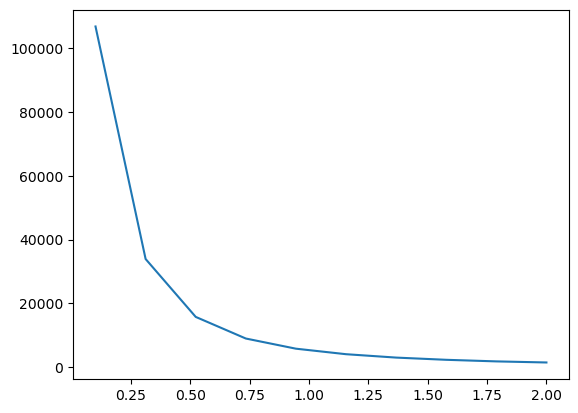

In [13]:
sns.lineplot(x=g, y=res)

need 2 measures to compare: robustness vs. value of score (how much it discriminates between outliers and "regular" points); check picture from Montavon. Visual examination/optimal point. Compare to hard min


Cluster = Partition der Daten um sie zusammenzufassen, nicht unbedingt obvious

# TEST IDEA

Certainly! Here's a step-by-step guide on how to perform the bootstrapping analysis to assess the robustness of anomaly detection methods using soft min-pooling:

1. Start with a dataset that contains both normal and anomalous instances.

2. Randomly split the dataset into two equal-sized subsets. These subsets will serve as the two variants of the original dataset that we will use to calculate the spread of anomaly scores.

3. For each subset, compute the anomaly scores for each instance using soft min-pooling with a specific value of the parameter γ. Repeat this process for different values of γ.

4. For each instance, calculate the difference between its anomaly score in the two subsets. This will give you a measure of how much the anomaly score varies when different subsets of the data are used.

5. Compute the standard deviation of the differences across all instances. This will give you an estimate of the spread of anomaly scores for a given value of γ.

6. Repeat steps 2-5 multiple times, with different random splits of the dataset. This will give you a distribution of spread estimates for each value of γ.

7. Analyze the distribution of spread estimates to determine the optimal value of γ that achieves the desired level of robustness. A small value of γ may lead to more robust estimates, but setting γ too small may introduce bias. You will need to find an appropriate tradeoff between robustness and bias.

Overall, bootstrapping can help assess the robustness of anomaly detection methods using soft min-pooling and determine the optimal value of γ that achieves the desired level of robustness.


In [58]:
def softmin2(z, gamma):
    if z[0] == 0:
        z = z[1:]
    else:
        z = z[0:-1]

    return -1 / gamma * np.log(1 / (len(z) - 1)) * np.sum(np.exp(-gamma * z))

<AxesSubplot: >

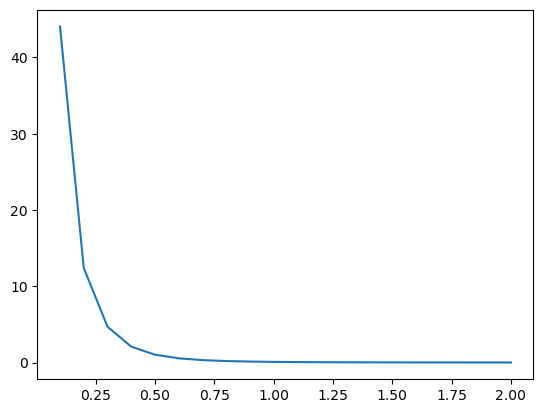

In [108]:
res = np.zeros((10, 20))

for i in range(10):

    # Creating a dataframe with 50% values of original dataframe
    part_50 = df.sample(frac = 0.5)
    
    # Creating dataframe with rest of the 50% values
    rest_part_50 = df.drop(part_50.index)

    nbrs1 = NearestNeighbors(n_neighbors=len(part_50), algorithm="ball_tree").fit(part_50.to_numpy())
    distances1, indices1 = nbrs1.kneighbors(df.to_numpy())

    nbrs2 = NearestNeighbors(n_neighbors=len(rest_part_50), algorithm="ball_tree").fit(rest_part_50.to_numpy())
    distances2, indices2 = nbrs2.kneighbors(df.to_numpy())

    

    for j, gamma in enumerate(np.linspace(0.1, 2, 20)):
        sm1 = np.apply_along_axis(softmin2, 1, distances1, gamma)
        sm2 = np.apply_along_axis(softmin2, 1, distances2, gamma)
        res[i, j] = np.std(sm2 - sm1)


# sns.histplot(sm2 - sm1)

sns.lineplot(x = np.linspace(0.1, 2, 20), y=np.std(res, axis=0))

<AxesSubplot: ylabel='Count'>

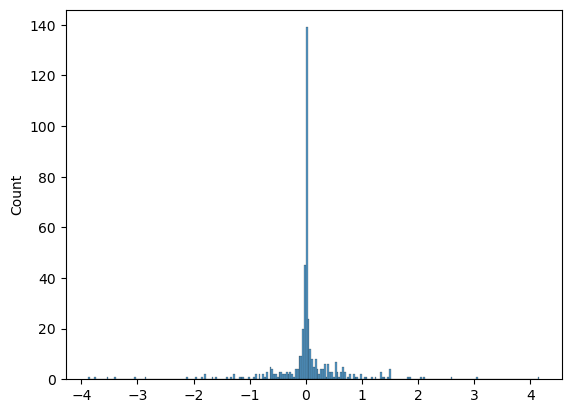

In [117]:
gamma = 1
sm1 = np.apply_along_axis(softmin2, 1, distances1**2, gamma)
sm2 = np.apply_along_axis(softmin2, 1, distances2**2, gamma)
sns.histplot(sm2 - sm1)

In [121]:
gamma = 1
-1/gamma * np.log(1/220)

5.393627546352362

In [118]:
np.log(np.exp(1))

1.0